# Objetivo
Evaluar la performance operativa y financiera de YPF, con énfasis en Vaca Muerta (shale oil/gas) a fin de establer una valoración.

Importar librería

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Fuente de datos

In [ ]:
# Definir la ruta del archivo
file_path_24 = './dataset/YPF_2024_FY24.xlsx'
file_path_23 = './dataset/YPF_2023_FY23.xlsx'

# Leer las hojas específicas del archivo .xlsx
upstream_operativas = pd.read_excel(file_path_24, sheet_name="Upstream - operativas")
upstream_resultados = pd.read_excel(file_path_24, sheet_name="Upstream - resultados")
downstream_resultados = pd.read_excel(file_path_24, sheet_name="Downstream - resultados")
downstream_operativas = pd.read_excel(file_path_24, sheet_name="Downstream - operativas")
kpi = pd.read_excel(file_path_24, sheet_name="KPIs", header=1)

In [ ]:
# Definir la ruta del archivo
file_path_24 = './dataset/YPF_2024_FY24.xlsx'
file_path_23 = './dataset/YPF_2023_FY23.xlsx'

# Lee ambos archivos para cada hoja, usando header=1 para que la segunda fila sea el header
upstream_operativas_24 = pd.read_excel(file_path_24, sheet_name="Upstream - operativas", header=1)
upstream_operativas_23 = pd.read_excel(file_path_23, sheet_name="Upstream - Operativas", header=1)
upstream_operativas = pd.concat([upstream_operativas_23, upstream_operativas_24], ignore_index=True)

upstream_resultados_24 = pd.read_excel(file_path_24, sheet_name="Upstream - resultados", header=1)
upstream_resultados_23 = pd.read_excel(file_path_23, sheet_name="Upstream - Resultados", header=1)
upstream_resultados = pd.concat([upstream_resultados_23, upstream_resultados_24], ignore_index=True)

downstream_resultados_24 = pd.read_excel(file_path_24, sheet_name="Downstream - resultados", header=1)
downstream_resultados_23 = pd.read_excel(file_path_23, sheet_name="Downstream - Resultados", header=1)
downstream_resultados = pd.concat([downstream_resultados_23, downstream_resultados_24], ignore_index=True)

downstream_operativas_24 = pd.read_excel(file_path_24, sheet_name="Downstream - operativas", header=1)
downstream_operativas_23 = pd.read_excel(file_path_23, sheet_name="Downstream - Operativas", header=1)
downstream_operativas = pd.concat([downstream_operativas_23, downstream_operativas_24], ignore_index=True)

kpi_24 = pd.read_excel(file_path_24, sheet_name="KPIs", header=1)
kpi_23 = pd.read_excel(file_path_23, sheet_name="KPIs", header=1)
kpi = pd.concat([kpi_23, kpi_24], ignore_index=True)

### 1. Análisis Operativo
- **Producción de petróleo, gas y derivados (upstream):**
  - Volúmenes actuales de producción.
  - Proyección de producción a 5 y 10 años (crecimiento o declive)

### 1.1. Preprocesamiento de datos:
* Selección de variables relevantes (producción de petróleo/gas).
* Limpieza de datos (valores nulos, duplicados, formateo).

In [34]:
kpi

,Unnamed: 0,KPI,Unnamed: 2,4T23,3T23,T/T Δ,4T22,A/A Δ,2023,2022,...,4T23.1,2023.1,4T24,3T24,2024,1T24,2T24,3T24.1,4T24.1,2024.1
0,NaN,Financieros,Ingresos,4194,4504,-0.068828,4645.000000,-0.097094,17311.000000,18757.000000,...,4194,17311.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,EBITDA Ajustado,1081.69177,926.381391,0.167653,933.329008,0.158961,4057.645084,4947.282237,...,1081.69177,4057.645084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Resultado neto,-1861,-137,12.583942,464.000000,NaN,-1277.000000,2234.000000,...,-1861,-1277.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Inversiones,1465.69378,1546,-0.051945,1420.571652,0.031763,5683.693780,4191.571652,...,1465.69378,5683.693780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,FCF,-60,-379,-0.841689,-188.000000,-0.680851,-740.000000,755.000000,...,-60,-740.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,NaN,NaN,Gas y energía,41.979613,39.014469,0.539726,NaN,0.66745,178.994082,NaN,...,41.979613,178.994082,69.998885,45.461918,146.000000,12.9961,17.543096,45.461918,69.998885,146.000000
70,NaN,NaN,Corporación,20.256695,55.334101,1.080998,NaN,1.659754,154.557559,NaN,...,20.256695,154.557559,53.87782,25.890373,124.286388,24.676357,19.841837,25.890373,53.87782,124.286388
71,NaN,NaN,Eliminaciones,0,0,NaN,NaN,NaN,0.000000,NaN,...,0,0.000000,0,0,0.000000,0,0,0,0,0.000000
72,NaN,NaN,Inversiones totales,1368.30034,1450.523191,-0.024237,NaN,-0.035335,5298.678600,NaN,...,1368.30034,5298.678600,1319.951485,1352.738433,5041.493981,1168.997004,1199.807058,1352.738433,1319.951485,5041.493981


In [35]:
upstream_operativas = upstream_operativas.dropna(axis=1, how='all')
upstream_operativas = upstream_operativas.dropna(axis=0, how='all')
kpi = kpi.dropna(axis=1, how='all')
kpi = kpi.dropna(axis=0, how='all')

upstream_operativas = upstream_operativas.iloc[2:].reset_index(drop=True)
kpi = kpi.iloc[0:].reset_index(drop=True)

kpi = kpi.rename(columns={kpi.columns[0]: 'KPI-CAT', kpi.columns[1]: 'KPI'})

upstream_operativas

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 12,...,1T23,2T23,3T23,4T23.1,2023.1,1T24,2T24,3T24.1,4T24.1,2024.1
0,Desglose producción neta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Producción Crudo (Kbbld),231.790205,236.897853,255.06305,0.100405,0.076679,226.036008,242.869283,0.074472,222.146481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Convencional,143.522114,141.955924,143.115485,-0.002833,0.008168,146.287954,142.997621,-0.022492,148.732666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Shale,85.145026,92.230844,109.410565,0.284991,0.186269,76.632569,97.210708,0.26853,70.359882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tight,3.123065,2.711085,2.537,-0.187657,-0.064212,3.115485,2.660954,-0.145894,3.053933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Producción NGL (Kbbld),42.550285,46.612081,39.55614,-0.070367,-0.151376,41.604263,42.947626,0.032289,44.215538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Convencional,13.246162,12.212872,9.145703,-0.309558,-0.251142,15.099792,11.583350,-0.23288,15.7549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Shale,27.929796,33.0863,29.269968,0.047984,-0.115345,25.188780,30.121280,0.195821,26.900219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tight,1.374327,1.312908,1.140468,-0.170162,-0.131342,1.315691,1.242996,-0.055252,1.560418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Producción Gas (Mm3d),35.749041,37.54667,34.361282,-0.038819,-0.084838,37.463117,36.209789,-0.033455,38.072774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
kpi

,KPI-CAT,KPI,4T23,3T23,T/T Δ,4T22,A/A Δ,2023,2022,Δ,...,4T23.1,2023.1,4T24,3T24,2024,1T24,2T24,3T24.1,4T24.1,2024.1
0,Financieros,Ingresos,4194,4504,-0.068828,4645.000000,-0.097094,17311.000000,18757.000000,-0.077091,...,4194,17311.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,EBITDA Ajustado,1081.69177,926.381391,0.167653,933.329008,0.158961,4057.645084,4947.282237,-0.179823,...,1081.69177,4057.645084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Resultado neto,-1861,-137,12.583942,464.000000,NaN,-1277.000000,2234.000000,NaN,...,-1861,-1277.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Inversiones,1465.69378,1546,-0.051945,1420.571652,0.031763,5683.693780,4191.571652,0.355982,...,1465.69378,5683.693780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,FCF,-60,-379,-0.841689,-188.000000,-0.680851,-740.000000,755.000000,NaN,...,-60,-740.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,Gas y energía,41.979613,39.014469,0.539726,NaN,0.66745,178.994082,NaN,-0.184331,...,41.979613,178.994082,69.998885,45.461918,146.000000,12.9961,17.543096,45.461918,69.998885,146.000000
68,NaN,Corporación,20.256695,55.334101,1.080998,NaN,1.659754,154.557559,NaN,-0.195857,...,20.256695,154.557559,53.87782,25.890373,124.286388,24.676357,19.841837,25.890373,53.87782,124.286388
69,NaN,Eliminaciones,0,0,NaN,NaN,NaN,0.000000,NaN,NaN,...,0,0.000000,0,0,0.000000,0,0,0,0,0.000000
70,NaN,Inversiones totales,1368.30034,1450.523191,-0.024237,NaN,-0.035335,5298.678600,NaN,-0.048538,...,1368.30034,5298.678600,1319.951485,1352.738433,5041.493981,1168.997004,1199.807058,1352.738433,1319.951485,5041.493981


In [37]:
# Dividir el DataFrame en dos partes en la fila 20 (índice 19)
upstream_operativas_1 = upstream_operativas.iloc[:16].reset_index(drop=True)
upstream_operativas_2 = upstream_operativas.iloc[16:].reset_index(drop=True)

In [38]:
upstream_operativas_1

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 12,...,1T23,2T23,3T23,4T23.1,2023.1,1T24,2T24,3T24.1,4T24.1,2024.1
0,Desglose producción neta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Producción Crudo (Kbbld),231.790205,236.897853,255.06305,0.100405,0.076679,226.036008,242.869283,0.074472,222.146481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Convencional,143.522114,141.955924,143.115485,-0.002833,0.008168,146.287954,142.997621,-0.022492,148.732666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Shale,85.145026,92.230844,109.410565,0.284991,0.186269,76.632569,97.210708,0.26853,70.359882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tight,3.123065,2.711085,2.537,-0.187657,-0.064212,3.115485,2.660954,-0.145894,3.053933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Producción NGL (Kbbld),42.550285,46.612081,39.55614,-0.070367,-0.151376,41.604263,42.947626,0.032289,44.215538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Convencional,13.246162,12.212872,9.145703,-0.309558,-0.251142,15.099792,11.583350,-0.23288,15.7549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Shale,27.929796,33.0863,29.269968,0.047984,-0.115345,25.188780,30.121280,0.195821,26.900219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tight,1.374327,1.312908,1.140468,-0.170162,-0.131342,1.315691,1.242996,-0.055252,1.560418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Producción Gas (Mm3d),35.749041,37.54667,34.361282,-0.038819,-0.084838,37.463117,36.209789,-0.033455,38.072774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2. Análisis exploratorio (EDA):
  * 1.2.1. Análisis univariado: distribución de variables clave (producción y costos de extracción).
  * 1.2.2. Análisis bivariado: relaciones entre variables (e.g., producción vs. costos, CAPEX vs. EBITDA).
  * 1.2.3. Análisis multivariado: correlaciones y patrones entre múltiples variables.
  * 1.2.4. Detección de outliers (e.g., picos en costos de extracción o caídas en producción).
  * 1.2.5. Análisis de tendencias: evolución temporal de producción, costos e inversiones.
  * 1.2.6. Identificación de patrones (e.g., relación entre inversión en Vaca Muerta y aumento de producción shale).
  * 1.2.7. Segmentación (e.g., upstream vs. downstream en términos de rentabilidad).
  * 1.2.8. Correlaciones (e.g., impacto del precio del petróleo en ingresos downstream).

#### 1.2.1. Análisis univariado: distribución de producción y costo de extracción

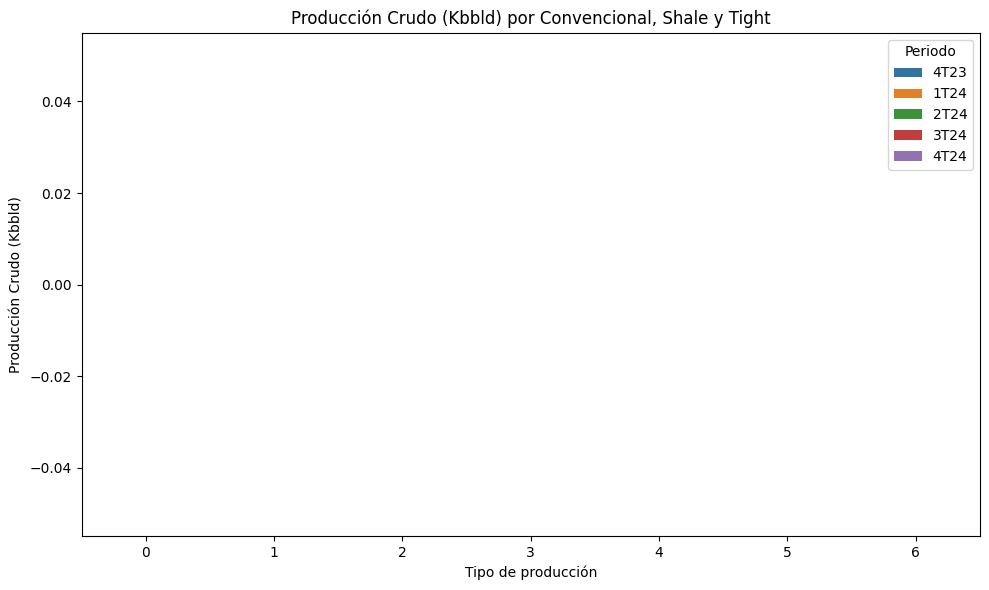

In [39]:
# Limpia los nombres de las columnas (quita espacios antes/después y convierte a string)
upstream_operativas_1.columns = upstream_operativas_1.columns.astype(str).str.strip()

# Ahora define los periodos
periodos = ['4T23', '1T24', '2T24', '3T24', '4T24']
 
# Selecciona las filas de interés (por ejemplo, filas 1 a 4 para las primeras categorías)
grupo = upstream_operativas_1.iloc[1:4]

# Reorganiza el DataFrame para el gráfico
df_melt = grupo.melt(id_vars='Upstream información operativa', value_vars=periodos,
                     var_name='Periodo', value_name='Producción')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melt,
    x='Upstream información operativa',
    y='Producción',
    hue='Periodo'
)
plt.title('Producción Crudo (Kbbld) por Convencional, Shale y Tight')
plt.xlabel('Tipo de producción')
plt.ylabel('Producción Crudo (Kbbld)')
plt.legend(title='Periodo')
plt.tight_layout()
plt.show()

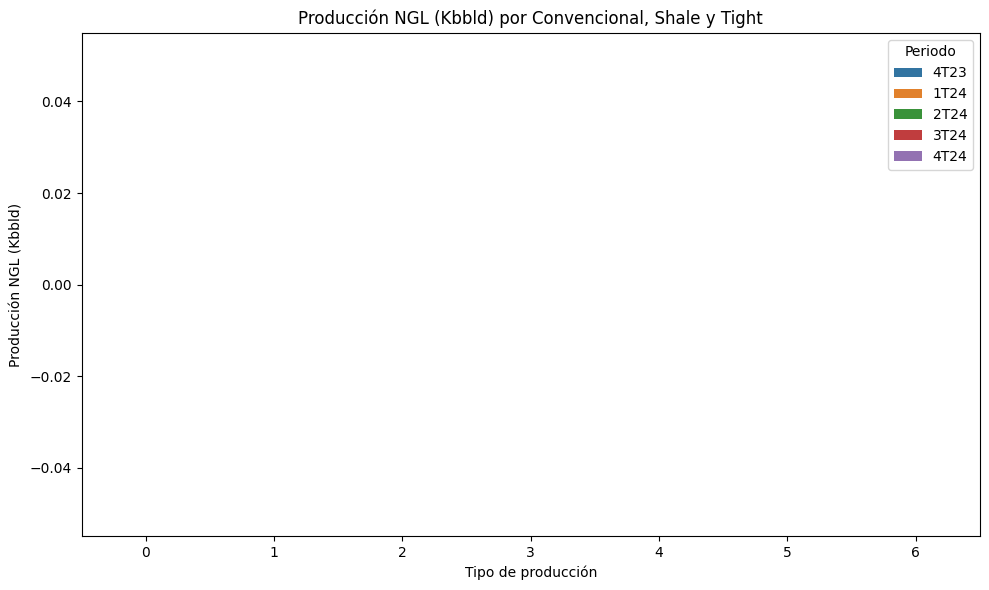

In [40]:
# Limpia los nombres de las columnas (quita espacios antes/después y convierte a string)
upstream_operativas_1.columns = upstream_operativas_1.columns.astype(str).str.strip()

# Ahora define los periodos
periodos = ['4T23', '1T24', '2T24', '3T24', '4T24']

# Selecciona las filas de interés (por ejemplo, filas 0 a 3 para las primeras categorías)
grupo = upstream_operativas_1.iloc[5:8]

# Reorganiza el DataFrame para el gráfico
df_melt = grupo.melt(id_vars='Upstream información operativa', value_vars=periodos,
                     var_name='Periodo', value_name='Producción')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melt,
    x='Upstream información operativa',
    y='Producción',
    hue='Periodo'
)
plt.title('Producción NGL (Kbbld) por Convencional, Shale y Tight')
plt.xlabel('Tipo de producción')
plt.ylabel('Producción NGL (Kbbld)')
plt.legend(title='Periodo')
plt.tight_layout()
plt.show()

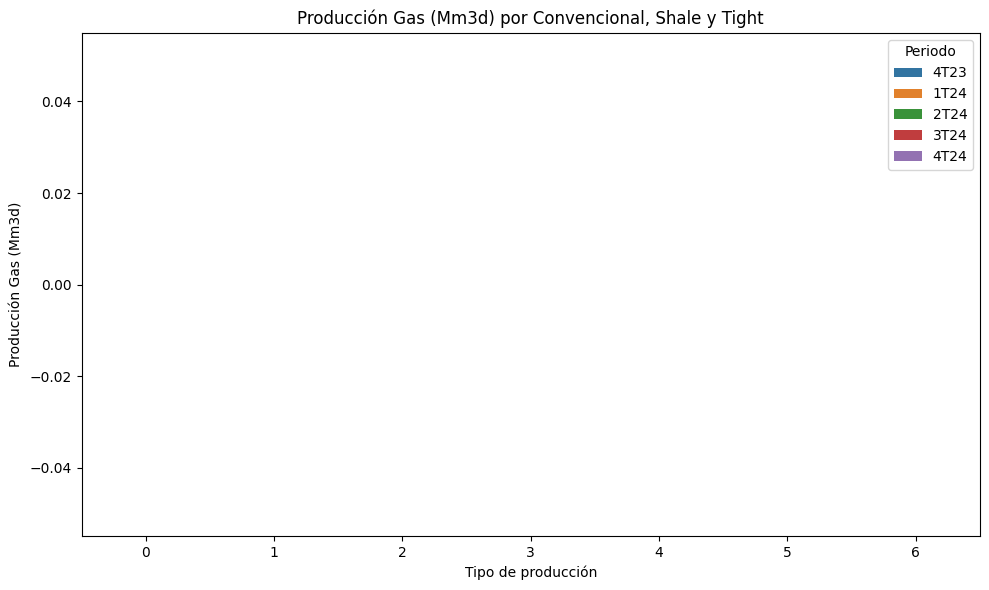

In [41]:
# Limpia los nombres de las columnas (quita espacios antes/después y convierte a string)
upstream_operativas_1.columns = upstream_operativas_1.columns.astype(str).str.strip()

# Ahora define los periodos
periodos = ['4T23', '1T24', '2T24', '3T24', '4T24']

# Selecciona las filas de interés (por ejemplo, filas 0 a 3 para las primeras categorías)
grupo = upstream_operativas_1.iloc[9:12]

# Reorganiza el DataFrame para el gráfico
df_melt = grupo.melt(id_vars='Upstream información operativa', value_vars=periodos,
                     var_name='Periodo', value_name='Producción')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melt,
    x='Upstream información operativa',
    y='Producción',
    hue='Periodo'
)
plt.title('Producción Gas (Mm3d) por Convencional, Shale y Tight')
plt.xlabel('Tipo de producción')
plt.ylabel('Producción Gas (Mm3d)')
plt.legend(title='Periodo')
plt.tight_layout()
plt.show()

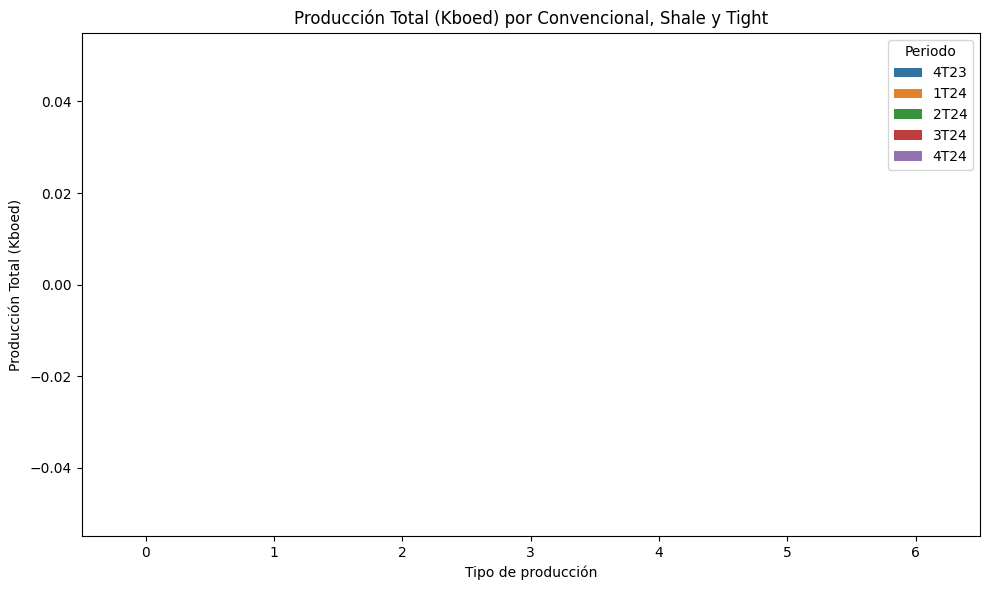

In [42]:
# Limpia los nombres de las columnas (quita espacios antes/después y convierte a string)
upstream_operativas_1.columns = upstream_operativas_1.columns.astype(str).str.strip()

# Ahora define los periodos
periodos = ['4T23', '1T24', '2T24', '3T24', '4T24']

# Selecciona las filas de interés (por ejemplo, filas 0 a 3 para las primeras categorías)
grupo = upstream_operativas_1.iloc[13:16]
 
# Reorganiza el DataFrame para el gráfico
df_melt = grupo.melt(id_vars='Upstream información operativa', value_vars=periodos,
                     var_name='Periodo', value_name='Producción')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melt,
    x='Upstream información operativa',
    y='Producción',
    hue='Periodo'
)
plt.title('Producción Total (Kboed) por Convencional, Shale y Tight')
plt.xlabel('Tipo de producción')
plt.ylabel('Producción Total (Kboed)')
plt.legend(title='Periodo')
plt.tight_layout()
plt.show()

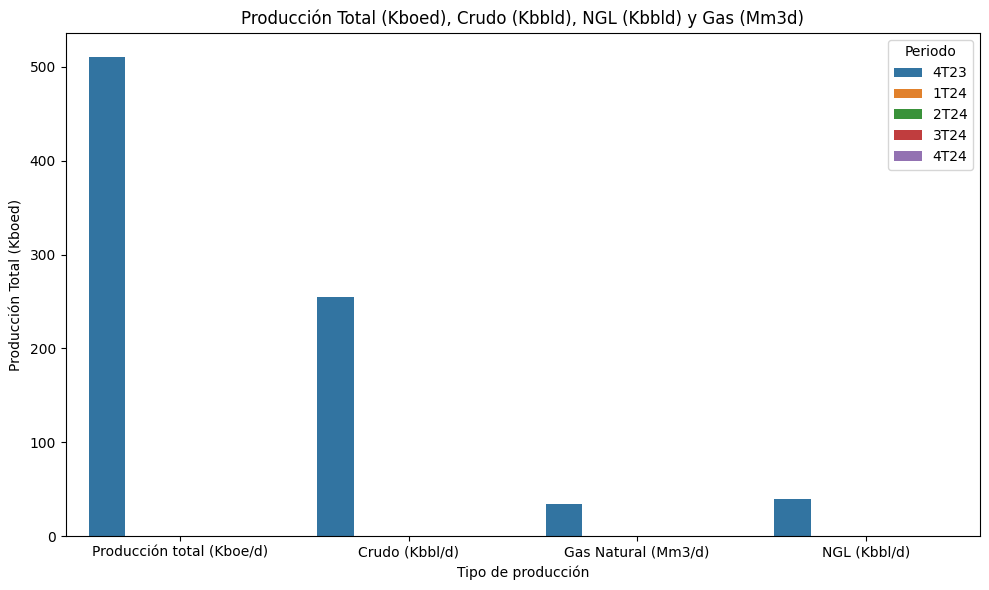

In [43]:
# Limpia los nombres de las columnas
kpi.columns = kpi.columns.astype(str).str.strip()

# Define los periodos
periodos = ['4T23', '1T24', '2T24', '3T24', '4T24']

# Selecciona las filas de interés (ajusta el rango según corresponda)
grupo = kpi.iloc[7:11]

# Reorganiza el DataFrame para el gráfico
df_melt = grupo.melt(id_vars='KPI', value_vars=periodos,
                     var_name='Periodo', value_name='Producción total')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melt,
    x='KPI',
    y='Producción total',
    hue='Periodo'
)
plt.title('Producción Total (Kboed), Crudo (Kbbld), NGL (Kbbld) y Gas (Mm3d)')
plt.xlabel('Tipo de producción')
plt.ylabel('Producción Total (Kboed)')
plt.legend(title='Periodo')
plt.tight_layout()
plt.show()

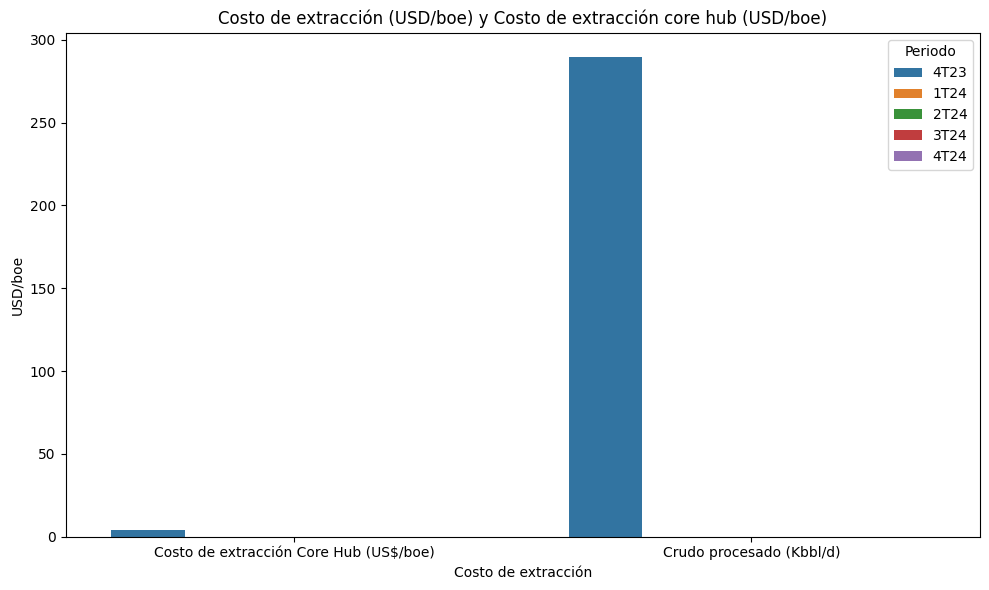

In [44]:
# Limpia los nombres de las columnas
kpi.columns = kpi.columns.astype(str).str.strip()

# Define los periodos
periodos = ['4T23', '1T24', '2T24', '3T24', '4T24']

# Selecciona las filas de interés (ajusta el rango según corresponda)
grupo = kpi.iloc[15:17]

# Reorganiza el DataFrame para el gráfico
df_melt = grupo.melt(id_vars='KPI', value_vars=periodos,
                     var_name='Periodo', value_name='Costo extracción')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melt,
    x='KPI',
    y='Costo extracción',
    hue='Periodo'
)
plt.title('Costo de extracción (USD/boe) y Costo de extracción core hub (USD/boe)')
plt.xlabel('Costo de extracción')
plt.ylabel('USD/boe')
plt.legend(title='Periodo')
plt.tight_layout()
plt.show()

Analisis:
1. Se observa un crecimiento en Shale en cada trimestre y un retroceso en Convencional.
2. Se observa que el ultimo trimestre no salio bueno para el Gas ni el NGL.
3. Se observa que el costo de extraccion ha aumentado en los últimos trimestres y el core hub disminuido.

#### 1.2.2. Análisis bivariado: relaciones entre variables (producción vs. costo de extracción)

In [45]:
# Selecciona las filas de interés
prod = kpi[kpi['KPI'] == 'Producción total (Kboe/d)']
costo = kpi[kpi['KPI'] == 'Costos extracción (US$/boe)']

# Elige los periodos a comparar
periodos = ['1T23', '2T23', '3T23', '4T23', '1T24', '2T24', '3T24', '4T24']

# Crea un DataFrame para graficar con color por periodo
df_plot = pd.DataFrame({
    'Producción': prod[periodos].values.flatten(),
    'Costo extracción': costo[periodos].values.flatten(),
    'Periodo': periodos
})

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_plot,
    x='Costo extracción',
    y='Producción',
    hue='Periodo',
    palette='tab10',
    s=100
)
plt.title('Relación entre Producción Total y Costo de Extracción por Periodo')
plt.xlabel('Costos extracción (US$/boe)')
plt.ylabel('Producción total (Kboe/d)')
plt.tight_layout()
plt.show()

ValueError: All arrays must be of the same length

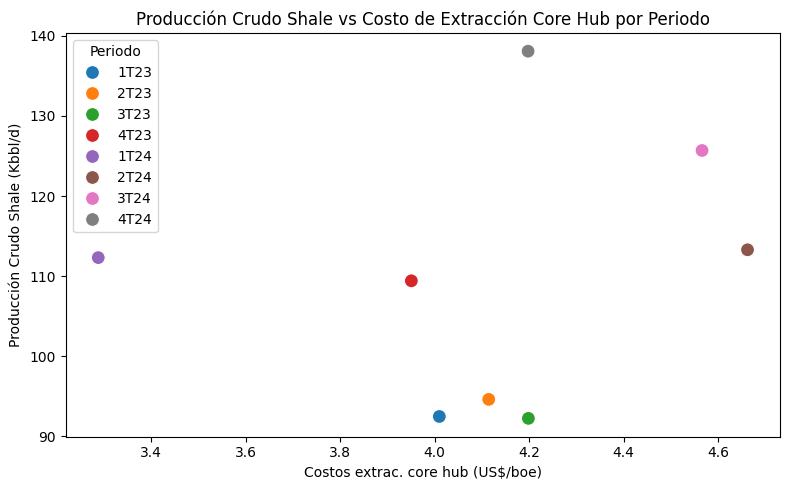

In [ ]:
# Selecciona las filas de interés
prod_shale = kpi[kpi['KPI'] == 'Producción Crudo Shale (Kbbl/d)']
costo_core = kpi[kpi['KPI'] == 'Costos extrac. core hub (US$/boe)']

# Define los periodos
periodos = ['1T23', '2T23', '3T23', '4T23', '1T24', '2T24', '3T24', '4T24']

# Crea un DataFrame para graficar con color por periodo
df_plot = pd.DataFrame({
    'Producción Shale': prod_shale[periodos].values.flatten(),
    'Costo extracción core hub': costo_core[periodos].values.flatten(),
    'Periodo': periodos
})

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_plot,
    x='Costo extracción core hub',
    y='Producción Shale',
    hue='Periodo',
    palette='tab10',
    s=100
)
plt.title('Producción Crudo Shale vs Costo de Extracción Core Hub por Periodo')
plt.xlabel('Costos extrac. core hub (US$/boe)')
plt.ylabel('Producción Crudo Shale (Kbbl/d)')
plt.tight_layout()
plt.show()

Observaciones:
1. Se observa que se puede aumentar la producción sin necesariamente aumentar el costo de extracción.
2. Se observa también que si se disminuye mucho el costo de producción parece que baja la producción.
3. Se observa que el 4T24 fue el mejor en términos de la relación entre producción crudo shale y costo de extracción core hub.
4. Se observa que el 4T24 fue el peor en términos de la relación entre producción total y costo de extracción.
5. Es claro que el enfoque es el shale.

#### 1.2.2. Análisis bivariado: relaciones entre variables (producción vs. inversion)

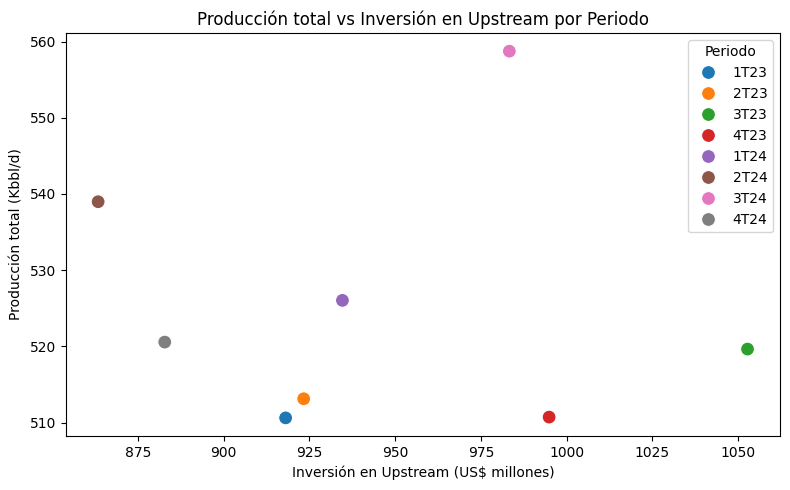

In [ ]:
# Selecciona las filas de interés
prod_total = kpi[kpi['KPI'] == 'Producción total (Kboe/d)']
inv_upstream = kpi[(kpi['KPI'] == 'Upstream') & (kpi['KPI-CAT'] == 'Inversiones')]

# Define los periodos
periodos = ['1T23', '2T23', '3T23', '4T23', '1T24', '2T24', '3T24', '4T24']

# Crea un DataFrame para graficar con color por periodo
df_plot = pd.DataFrame({
    'Producción total': prod_total[periodos].values.flatten(),
    'Upstream': inv_upstream[periodos].values.flatten(),
    'Periodo': periodos
})

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_plot,
    x='Upstream',
    y='Producción total',
    hue='Periodo',
    palette='tab10',
    s=100
)
plt.title('Producción total vs Inversión en Upstream por Periodo')
plt.xlabel('Inversión en Upstream (US$ millones)')
plt.ylabel('Producción total (Kbbl/d)')
plt.tight_layout()
plt.show()

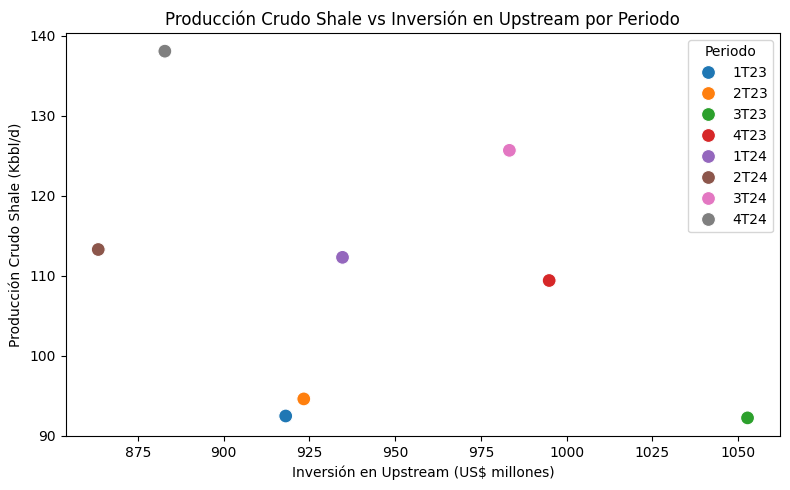

In [ ]:
# Selecciona las filas de interés
prod_shale = kpi[kpi['KPI'] == 'Producción Crudo Shale (Kbbl/d)']
inv_upstream = kpi[(kpi['KPI'] == 'Upstream') & (kpi['KPI-CAT'] == 'Inversiones')]

# Define los periodos
periodos = ['1T23', '2T23', '3T23', '4T23', '1T24', '2T24', '3T24', '4T24']

# Crea un DataFrame para graficar con color por periodo
df_plot = pd.DataFrame({
    'Producción Shale': prod_shale[periodos].values.flatten(),
    'Upstream': inv_upstream[periodos].values.flatten(),
    'Periodo': periodos
})

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_plot,
    x='Upstream',
    y='Producción Shale',
    hue='Periodo',
    palette='tab10',
    s=100
)
plt.title('Producción Crudo Shale vs Inversión en Upstream por Periodo')
plt.xlabel('Inversión en Upstream (US$ millones)')
plt.ylabel('Producción Crudo Shale (Kbbl/d)')
plt.tight_layout()
plt.show()

Observaciones:
1. En los últimos trimestres se observa una mejoría en la relación producción - inversión.
2. El 4T24 fue uno de los mejores en cuanto a reducción de inversión, y aun así, la producción del crudo shale fue la mejor, y en el total, fue medianamente buena.
3. El 2T24 fue también muy bueno en cuanto a reducción de inversión (la más baja), con una producción total y crudo shale bastante buena.

#### 1.2.2. Análisis bivariado: relaciones entre variables (costo de extracción vs. CAPEX)

#### 1.2.3. Análisis multivariado: correlaciones y patrones entre múltiples variables

In [ ]:
upstream_resultados.head()

,Unnamed: 0,Resultados Upstream,4T24,3T24,4T23,T/T ∆,A/A ∆,Unnamed: 7,2024,2023,...,2T23,3T23,4T23.1,2023.1,Unnamed: 18,1T24,2T24,3T24.1,4T24.1,2024.1
0,NaN,"Cifras no auditadas, en US$ millones",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Crudo,1590.952585,1599.187796,1331.83583,-0.00515,0.194556,NaN,6317.282238,5399.352455,...,1363.074085,1298.828003,1331.83583,5399.352455,NaN,1559.185462,1567.956395,1599.187796,1590.952585,6317.282238
2,NaN,Gas natural,345.444065,615.652851,353.388599,-0.438898,-0.022481,NaN,1825.477115,1733.738966,...,472.885609,549.887211,353.388599,1733.738966,NaN,353.932217,510.447982,615.652851,345.444065,1825.477115
3,NaN,Otros,32.60335,31.159352,24.775571,0.046342,0.315947,NaN,132.240647,109.908580,...,23.040306,32.284786,24.775571,109.908580,NaN,33.882321,34.595623,31.159352,32.60335,132.240647
4,NaN,Ingresos,1969,2246,1710,-0.12333,0.151462,NaN,8275.000000,7243.000000,...,1859,1881,1710,7243.000000,NaN,1947,2113,2246,1969,8275.000000


In [ ]:
downstream_resultados.head()

,Unnamed: 0,Resultados Downstream,4T24,3T24,4T23,T/T ∆,A/A ∆,Unnamed: 7,2024,2023,...,2T23,3T23,4T23.1,2023.1,Unnamed: 18,1T24,2T24,3T24.1,4T24.1,2024.1
0,NaN,"Cifras no auditadas, en US$ millones",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Gasoil (3ros),1580.566611,1646.176873,1671.604691,-0.039856,-0.054461,NaN,6454.006053,6492.791337,...,1638.750616,1562.864328,1671.604691,6492.791337,NaN,1555.521406,1671.741163,1646.176873,1580.566611,6454.006053
2,NaN,Naftas (3ros),1022.496434,1022.537176,943.013302,-0.000040,0.084286,NaN,4013.134800,3493.312214,...,833.343049,824.493715,943.013302,3493.312214,NaN,1021.901794,946.199396,1022.537176,1022.496434,4013.134800
3,NaN,Otros mercado local,682.749404,753.248853,770.929830,-0.093594,-0.114382,NaN,2657.202629,3204.136665,...,814.897568,813.710208,770.929830,3204.136665,NaN,572.031797,649.172575,753.248853,682.749404,2657.202629
4,NaN,Mercado externo,738.543572,705.428772,534.452177,0.046943,0.381870,NaN,2766.015168,1797.759784,...,367.008767,459.931749,534.452177,1797.759784,NaN,632.191574,689.851251,705.428772,738.543572,2766.015168


In [ ]:
downstream_operativas.head()

,Unnamed: 0,Información Operativa Downstream,4T24,3T24,4T23,T/T ∆,A/A ∆,Unnamed: 7,2024,2023,...,2T23,3T23,4T23.1,2023.1,Unnamed: 18,1T24,2T24,3T24.1,4T24.1,2024.1
0,NaN,Cifras no auditadas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Crudo procesado (Kbbld),304.060186,298.328026,289.752432,0.019214,0.049379,NaN,300.667594,294.434388,...,305.11534,276.093307,289.752432,294.434388,NaN,301.097644,299.172950,298.328026,304.060186,300.667594
2,NaN,Utilización refinerias (%),0.899749,0.882787,0.883230,169.621163,165.189700,NaN,0.889710,0.897502,...,0.93006,0.841594,0.883230,0.897502,NaN,0.890982,0.885287,0.882787,0.899749,0.889710
3,NaN,"Capacidad nominal de 337,94 Kbbl/d desde 1T24.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Preprocesamiento de datos:
  * 1.1. Selección de columnas relevantes (ingresos, EBITDA, producción de petróleo/gas, costos operativos, CAPEX, deuda, etc.).
  * 1.2. Limpieza de datos (valores nulos, duplicados, formateo).

In [ ]:
upstream_operativas = pd.read_excel(file_path, sheet_name="Upstream - operativas")